### NOTICE:

1. Mechanical correctness of your python codes: your codes must be accurate
2. Clarity of jupyter notebook and organization of outputs:

- The python codes you write must be accompanied with "comments" using # or markdown
- All outputs must be visible in your jupyter notebook. If necessary, explain the outputs using markdown.
- **Do not print out an entire output. Print the first five rows**

3. Formatting: **"This exam must contain K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."** 

 - A **grade of XF** can result from a breach of academic honesty. The F indicates failure in the course; the X indicates the reason is an Honor Pledge violation.” (http://www.k-state.edu/provost/resources/teaching/course.htm (Links to an external site.)) (See Academic Dishonesty below). 
- **Unauthorized collaboration** (including but not limited to collaborating with other students on the midterm exam is forbidden) 
- **Unauthorized aid** (including but not limited to sharing your codes with other students, receiving codes from another)
- **Plagiarism** (including but not limited to copying words of another (on the Internet or articles) as your own)(please credit the references/sources)

**K-State Honor Code**

> "This exam must contain K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Yuto Wada

# Instructions of Fall 2022 MIS 670 Mid-term Exam

1. This is an open book open notes exam. You can use all the course materials as references. You also can Google the examples (please credit the sources), **but collaborations are forbidden and each of you should deliver different results**. 
2. The exam is due on **10/13/2022 at 11:59 PM CT** (in total 7 days [10/06 - 10/13]).
3. No make-up exams and late submission is not allowed.
4. **Total points for this exam are 75.**

## Section 1: Word Cloud Map for customer reviews on Tripadvisor (33 points)

### Part 1: Data collection (15 points)

1. Developer a scraper for Tripadvisor https://www.tripadvisor.com/

2. Collect the customer reviews from one interest (for example: customer reviews for a restaurant in Manhattan, Kansas).

    2.1 You need to give this project a title, formatting is as the following.
    
    `Word Cloud - Customer Review - Restaurant/Hotel/Tourist attraction name - Location` 
      
      <span style="color:red">(**Notice:** each of you should pick a different project, meaning that identical data will be considered plagiarism.)</span>.
     
    2.2 Collect at least 100 customer reviews. 
    
    (select some popular places, must meet the requirements for 100 rows).
    
    2.3 Your data must contain `Cutomer name`,`Post date`,`Review texts`.
    
    2.4 Save your data in to Pandas dataframe and print the first five rows (using .head()).
    
    2.5 Display the data information (using .info()).

In [26]:
# Libraries
import time
import pandas as pd   
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import NoSuchElementException
import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#Get Chrome driver
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 8.15M/8.15M [00:00<00:00, 8.91MB/s]
/var/folders/1j/79l9x7_16cldqkzdldfx37vh0000gn/T/ipykernel_18220/479641510.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
links = [] #create an empty list for collecting all the project urls

#start with pagination
# for 4 pages:
#from the begining number: 0 to the end number: 1010, add 10 each iteration
for i in range(10,1010,10):
    urls = "https://www.tripadvisor.com/Attraction_Review-g44881-d105725-Reviews-or" + str(i) + "-St_Louis_Zoo-Saint_Louis_Missouri.html"
    page = driver.get(urls)
    driver.implicitly_wait(10) #driver sleep for 10 seconds

    for i in driver.find_elements("xpath",'//*[@id="tab-data-qa-reviews-0"]/div/div[5]/div[1]/span/div/div[3]/a'): #find each job's url
        link = i.get_attribute('href')
        links += [link] # add the urls (links) one by one to the links list
print (len(links))

100


In [5]:
#initialize dictionary with lists
review_info = {'CustomerName':[],'PostDate':[],'ReviewText':[]}

# open project one by one (open each link)
for i in links:
    driver.get(i)
    time.sleep(10)
    
    try:
        customer_name = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[1]/div/div/div[1]/div[2]/div').text.strip()
    except NoSuchElementException:
        customer_name = 0
    
    try:
        post_date = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[2]/span[2]').text.strip()
    except NoSuchElementException:
        post_date = 0
    
    try:
        review_text = driver.find_element("xpath",'/html/body/div[2]/div[2]/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div/div/div/div[2]/div[3]/div/p/span').text.strip()
    except NoSuchElementException:
        review_text = 0     
   
    
    review_info['CustomerName'].append(customer_name) 
    review_info['PostDate'].append(post_date)
    review_info['ReviewText'].append(review_text)
          
driver.close()

In [9]:
reviews = pd.DataFrame(review_info)
reviews.head()

,CustomerName,PostDate,ReviewText
0,C9204NFtheresaw,"Reviewed September 6, 2022","As a wheelchair user, at most zoos I am unable..."
1,386janeg,"Reviewed August 7, 2022",The zoo has a lot of different animals .My fav...
2,heathersoohon,"Reviewed July 9, 2022",We Love the Zoo!\nOur 2 youngest children have...
3,Echolynn,"Reviewed June 27, 2022",The St. Louis zoo is hands down the greatest z...
4,betsyr302,"Reviewed June 2, 2022",The fact that it was FREE was nice because we ...


In [10]:
#print 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerName  100 non-null    object
 1   PostDate      100 non-null    object
 2   ReviewText    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


### Part 2: Data cleaning (8 points)

1. Display the 55th row in your dataframe.

In [16]:
print(reviews.iloc[55])

CustomerName                                             Varsha G
PostDate                                    Reviewed May 28, 2019
ReviewText      If you are visiting St.Louis don't miss to vis...
Name: 55, dtype: object


2. Display the first 5 rows of the ["Customer name"] column only.

In [19]:
reviews["CustomerName"].head()

0    C9204NFtheresaw
1           386janeg
2      heathersoohon
3           Echolynn
4          betsyr302
Name: CustomerName, dtype: object

3. What is the data type of the ["Post date"] column?

In [20]:
print(type(reviews["PostDate"]))

<class 'pandas.core.series.Series'>


4. Remove useless symbols from the ["Review texts"].

In [22]:
reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
reviews["ReviewText"] = reviews["ReviewText"].str.replace(r'[^a-zA-Z0-9]+', ' ')
reviews["ReviewText"] = reviews["ReviewText"].str.replace('@#', '')
reviews["ReviewText"] = reviews["ReviewText"].str.replace("\n", '')

reviews.head()


/var/folders/1j/79l9x7_16cldqkzdldfx37vh0000gn/T/ipykernel_18220/3246144652.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs["ReviewText"] = jobs["ReviewText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
/var/folders/1j/79l9x7_16cldqkzdldfx37vh0000gn/T/ipykernel_18220/3246144652.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs["ReviewText"] = jobs["ReviewText"].str.replace(r'[^a-zA-Z0-9]+', ' ')


,CustomerName,PostDate,ReviewText
0,C9204NFtheresaw,"Reviewed September 6, 2022",As a wheelchair user at most zoos I am unable ...
1,386janeg,"Reviewed August 7, 2022",The zoo has a lot of different animals My favo...
2,heathersoohon,"Reviewed July 9, 2022",We Love the Zoo Our 2 youngest children have h...
3,Echolynn,"Reviewed June 27, 2022",The St Louis zoo is hands down the greatest zo...
4,betsyr302,"Reviewed June 2, 2022",The fact that it was FREE was nice because we ...


5. Lower the cases of the ["Review texts"].

In [25]:
reviews["ReviewText"] = reviews["ReviewText"].str.lower()
reviews.head()

,CustomerName,PostDate,ReviewText
0,C9204NFtheresaw,"Reviewed September 6, 2022",as a wheelchair user at most zoos i am unable ...
1,386janeg,"Reviewed August 7, 2022",the zoo has a lot of different animals my favo...
2,heathersoohon,"Reviewed July 9, 2022",we love the zoo our 2 youngest children have h...
3,Echolynn,"Reviewed June 27, 2022",the st louis zoo is hands down the greatest zo...
4,betsyr302,"Reviewed June 2, 2022",the fact that it was free was nice because we ...


6. Tokenize the ["Review texts"].

In [31]:
reviews["ReviewText"].apply(word_tokenize)


,CustomerName,PostDate,ReviewText
0,C9204NFtheresaw,"Reviewed September 6, 2022",as a wheelchair user at most zoos i am unable ...
1,386janeg,"Reviewed August 7, 2022",the zoo has a lot of different animals my favo...
2,heathersoohon,"Reviewed July 9, 2022",we love the zoo our 2 youngest children have h...
3,Echolynn,"Reviewed June 27, 2022",the st louis zoo is hands down the greatest zo...
4,betsyr302,"Reviewed June 2, 2022",the fact that it was free was nice because we ...


7. Remove the stopwords from ["Review texts"]

In [58]:
#tokenization or word split
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'movie', 'one', 'like', 'could', 'see', 'also', 
'get', 'zoo', 'animal', 'animals', 'louis', 'day', 'st', 'lot'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
#Remove stopwords
# tokens = (word for word in tokens if word not in extra_stoplist)
# # Filter non-alphanumeric characters from tokens
# tokens = (word for word in tokens if word.isalpha())
# #remove short words
# tokens = (word for word in tokens if len(word) >= 3)

reviews["ReviewText"] = reviews["ReviewText"].apply(lambda x: ' '.join([word for word in x.split() if word not in extra_stoplist]))
reviews.head()

,CustomerName,PostDate,ReviewText
0,C9204NFtheresaw,"Reviewed September 6, 2022",wheelchair user zoos unable exhibits able staf...
1,386janeg,"Reviewed August 7, 2022",different favorite giraffe feed really neat re...
2,heathersoohon,"Reviewed July 9, 2022",love 2 youngest children severe emergencies me...
3,Echolynn,"Reviewed June 27, 2022",hands greatest ever visited top free wish live...
4,betsyr302,"Reviewed June 2, 2022",fact free nice young grandkids last long able ...


8. Display the top 10 words in ["Review texts"] based on the Word Frequency results

In [59]:
#Displaying top 10 words
reviews.ReviewText.str.split(expand=True).stack().value_counts()[:10]

free       82
great      44
parking    38
visit      36
well       33
train      29
time       27
nice       26
park       24
place      24
dtype: int64

### Part 3: Data visualization (Word Cloud) (10 points)

1. Create a word cloud map for the ["Review texts"]

(-0.5, 399.5, 199.5, -0.5)

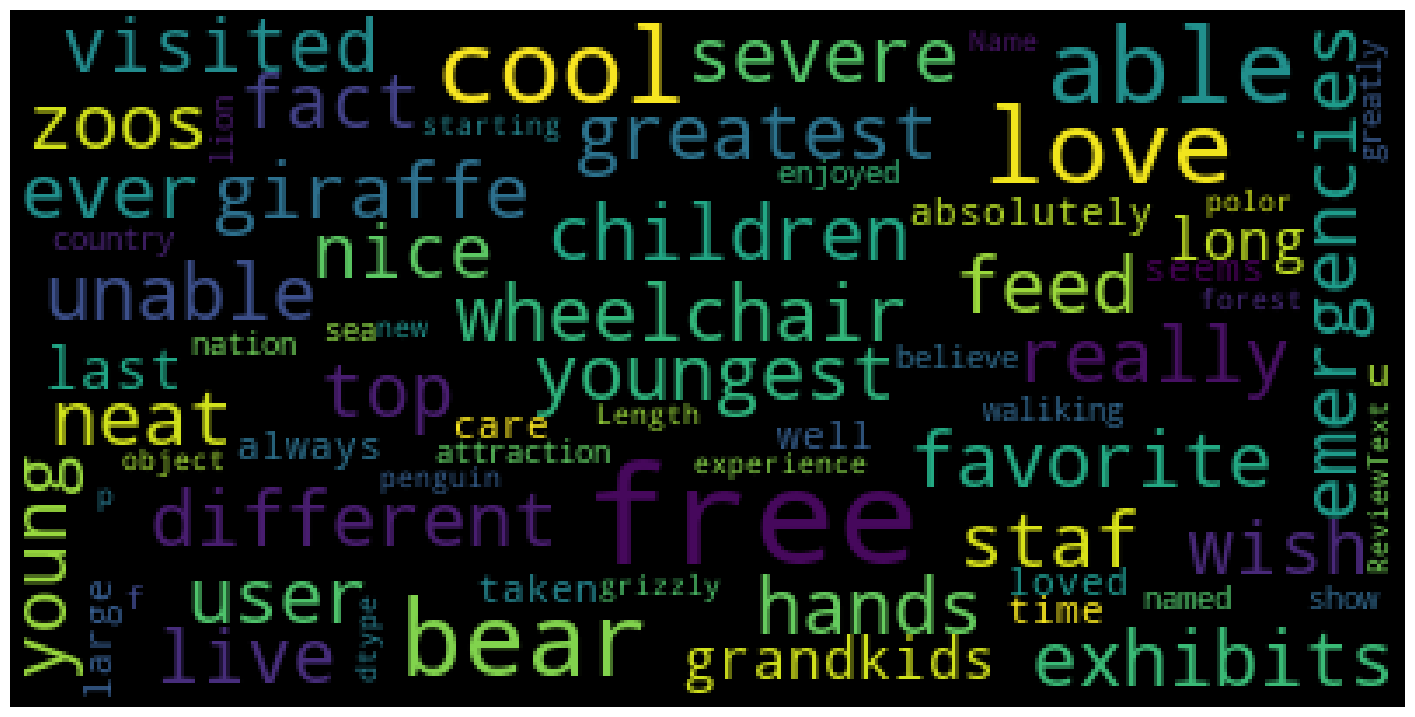

In [60]:
#Creating Word Cloud
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(reviews["ReviewText"]))
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")

## Section 2: Data Wrangling with Pandas (10 points)

In [ ]:
import pandas as pd

In [ ]:
#use the nba dataset
#load nba dataset
nba = pd.read_csv("https://cdncontribute.geeksforgeeks.org/wp-content/uploads/nba.csv")

nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


1. Display the descriptive statistics of the nba.

In [ ]:
nba.describe(include='all')
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


2. Drop the rows of column ["Salary"] is null and replace the original nba dataframe. 

(Notice: do not drop all the null values in the data. Only drop the null values in column ["Salary"])

In [ ]:
#remove rows that contains null values (NaN)
new_nba = nba.dropna()
new_nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


3. Rename the column ["Name"] to ["Full name"]

In [ ]:
new_nba.rename(columns={'Name': 'Full Name'}, inplace=True)
new_nba.head()

C:\Users\yutow\AppData\Local\Temp\ipykernel_9568\298458461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_nba.rename(columns={'Name': 'Full Name'}, inplace=True)


,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


4. How many Positions for the players (hint: check the unique values)

In [ ]:
print(len(nba.Position.unique()))

6


5. Replace the Positon with numbers ("PG":1, "SF":2,"SG":3 ... ) then drop the rows with null values in position.

In [ ]:
positions = {"PG": 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5} #Replacing positions with numbers
replace_nba = new_nba.replace({'Position': positions})
replace_nba.head() #print out dataframe

,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,1,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,3,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,2,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,4,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,5,25.0,7-0,238.0,Gonzaga,2165160.0


6. Display all the players from position "SG"

In [ ]:
replace_nba.loc[replace_nba['Position'] == 2].head()

,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary
3,R.J. Hunter,Boston Celtics,28.0,2,22.0,6-5,185.0,Georgia State,1148640.0
12,Evan Turner,Boston Celtics,11.0,2,27.0,6-7,220.0,Ohio State,3425510.0
13,James Young,Boston Celtics,13.0,2,20.0,6-6,215.0,Kentucky,1749840.0
16,Markel Brown,Brooklyn Nets,22.0,2,24.0,6-3,190.0,Oklahoma State,845059.0
17,Wayne Ellington,Brooklyn Nets,21.0,2,28.0,6-4,200.0,North Carolina,1500000.0


7. Add a new column name ['Random'] with random numbers

In [ ]:
import random
replace_nba['Random'] = [random.randint(1,500)  for i in replace_nba.index]
replace_nba.head()

,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary,Random
0,Avery Bradley,Boston Celtics,0.0,1,25.0,6-2,180.0,Texas,7730337.0,22
1,Jae Crowder,Boston Celtics,99.0,3,25.0,6-6,235.0,Marquette,6796117.0,460
3,R.J. Hunter,Boston Celtics,28.0,2,22.0,6-5,185.0,Georgia State,1148640.0,349
6,Jordan Mickey,Boston Celtics,55.0,4,21.0,6-8,235.0,LSU,1170960.0,400
7,Kelly Olynyk,Boston Celtics,41.0,5,25.0,7-0,238.0,Gonzaga,2165160.0,105


8. How much is the average salary for all the players?

(Round the results to 3 decimals) 

In [ ]:
# Round to specific decimal 
round((nba["Salary"].mean()),3)

4842684.105

9. Who is/are the oldest player(s)?

In [ ]:
new_nba = replace_nba.sort_values(by = 'Age', ascending=False)
new_nba.head(2)

,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary,Random
298,Tim Duncan,San Antonio Spurs,21.0,5,40.0,6-11,250.0,Wake Forest,5250000.0,309
304,Andre Miller,San Antonio Spurs,24.0,1,40.0,6-3,200.0,Utah,250750.0,453


10. Who is/are the youngest player(s)?

In [ ]:
new_nba = replace_nba.sort_values(by = 'Age', ascending=True)
new_nba.head(2)

,Full Name,Team,Number,Position,Age,Height,Weight,College,Salary,Random
226,Rashad Vaughn,Milwaukee Bucks,20.0,2,19.0,6-6,202.0,UNLV,1733040.0,36
122,Devin Booker,Phoenix Suns,1.0,2,19.0,6-6,206.0,Kentucky,2127840.0,377


## Section 3: Sentiment Analysis for Social Media (32 points)

### Part 1: Data Collection (10 points)

1. Insert your Twitter API keys and scraper the twitter data

In [ ]:
import tweepy
import pandas as pd

# put your credential API information here (do not include your API in the submission)
# API Consumer Key and Secret from Twitter
api_key = "WsEUv6afCiNthkSLWHIHn8yUM"
api_secret = "jtg2kd1CFL1txDao6NouIUO7xZzCXSM4yiP4WyuiiqQ50qTtjf"

access_token = "1564294883636088838-jhUHzc9xuIH9WMu6wCPahsWM4LiwaG"
access_token_secret = "vM6EmVcxk3L94D1bVQz19MliIUcSW5uA9660IZk1FQken"

# authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

2. Select a keyword that you are interested in then collect **100 tweets**

    2.1 Using tweepy.Cursor(api.search_tweets/tweets,q=" " ...)
    
    2.2 Collecting the following information:
        post_time
        tweet_id
        tweet_text
        retweet_count
        user_name
        user_screen_name
        user_location
        user_followers_count
        
    2.3 Save your data into a Pandas dataframe then display the first five rows (.head())
    
    <span style="color:red">(**Notice:** each of you should choose a different search word, meaning that identical data will be considered plagiarism.)</span>.

In [ ]:
tweets = [] #initialize an empty list

for status in tweepy.Cursor(api.search_tweets,q="Chicago Marathon",
                            until='2022-10-11', #Twitter will automatically sample the last 7 days of data, and only allows you to get 7-day data
                            result_type='recent',
                            include_entities=True,
                            tweet_mode='extended', #otherwise it only captures 140 characters
                            lang="en").items(100):
    
    post_time = status.created_at # tweets posting time
    tweet_id = status.id_str # gets the tweets thread ID
    tweet_text= status.full_text # gets the tweets texts
    retweet_count = status.retweet_count
    user_name = status.user.name
    user_screen_name = status.user.screen_name
    user_location = status.user.location
    user_followers_count = status.user.followers_count
    
    tweets.append((post_time, tweet_id, tweet_text, retweet_count, user_name, user_screen_name, user_location, user_followers_count))

headers = ['Post Time', 'Tweet ID', 'TweetText', 'RetweetCount', 'UserName', 'UserScreenName', 'User Location', 'UserFollowerCounts']

tweet_marathon = pd.DataFrame(tweets,columns = headers)
tweet_marathon.head()

,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts
0,2022-10-10 23:58:44+00:00,1579622492163145730,@sometherapist Friend of mine in her 50s just ...,0,Coddled affluent professional,feelsdesperate,"Okay, Oklahoma",8803
1,2022-10-10 23:56:23+00:00,1579621901089263618,chicago usps reopen mailboxes along the marath...,0,Katt #MCRNJ #MCRNJ2 #MCRRIOT,iridescentKatt,a shithole country,1238
2,2022-10-10 23:56:08+00:00,1579621837319049216,RT @LaCasaNorte: Stop by! We're cheering La Ca...,1,Anne Bowhay,AnneB19,"Oak Park, Illinois",326
3,2022-10-10 23:54:46+00:00,1579621492635361280,"Of local runners from Batavia, participant Mic...",0,Batavia Patch,BataviaPatch,"Batavia, IL",2778
4,2022-10-10 23:54:02+00:00,1579621308987748354,RT @barrybutler9: This morning as Chicago Mara...,392,Paula - Issa's young cute yet disapproving auntie,grooveparlortv,Chicago LA Paris,1862


### Part 2: Data Cleaning (10 points)

1. How many users (use Screen Name) in the dataframe (count the unique values)?

In [ ]:
print(len(tweet_marathon.UserScreenName.unique()))

93


2. Who tweets the most?

In [ ]:
tweet_marathon['UserScreenName'].value_counts().head(5) # top 5 users who posts the most tweets for hurricane ian

ygindia1        3
maerunes        3
usasharenews    2
NayeMamani      2
naaapp8         2
Name: UserScreenName, dtype: int64

3. Display this person's full information.

In [ ]:
pd.set_option('display.max_colwidth', None)
Most_tweet =tweet_marathon[tweet_marathon['UserScreenName']=='ygindia1']
Most_tweet['TweetText']

9                                                                                                                                                                                                                   #ChicagoMarathon\n\n#BREAKING ! #RuthChepng’etich retains the Chicago Marathon tittle with a time of 2:14:18. Missing the world record with only 14 seconds. ⁦ https://t.co/Z4noGkwPXM
20    @barrybutler9 @ChiMarathon @WGNNews @ABC7Chicago @cbschicago @971TheDrive @ChooseChicago @nbcchicago @fox32news @CARARuns @LPCC09 Emily Sisson, 30, came in to the Chicago Marathon confident, saying she would go for the American record if she was having a good day. \n\nShe finished in a time of 2:18:29 — demolishing the U.S. women's marathon record by 43 seconds. https://t.co/qxWWzJB3oe
21                                                                                                                  #ChicagoMarathon\n\nEmily Sisson, 30, came in to the Chicago Marathon confident, saying she wo

4. Who is the most popular user in the dataset? (has the most number of followers)

In [ ]:
tweet_marathon.loc[tweet_marathon["UserFollowerCounts"].idxmax()].UserScreenName

'WBEZ'

5. Display this person's full information.

In [ ]:
tweet_marathon.loc[tweet_marathon["UserFollowerCounts"].idxmax()]

Post Time                                                                                                                                                                                          2022-10-10 23:00:14+00:00
Tweet ID                                                                                                                                                                                                 1579607768646168580
TweetText             The Chicago Marathon took place this past weekend, and WBEZ reporter Charmaine Runes was one of the runners who completed the 26.2-mile race. Read all about the experience 👇\nhttps://t.co/Ilf92Xavuk
RetweetCount                                                                                                                                                                                                               2
UserName                                                                                                            

6. Remove the emojis from the tweets texts.

In [ ]:
tweet_marathon['TweetText'] =  tweet_marathon['TweetText'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
tweet_marathon.head()

,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts
0,2022-10-10 23:58:44+00:00,1579622492163145730,@sometherapist Friend of mine in her 50s just set a PR at Chicago marathon 3hr30,0,Coddled affluent professional,feelsdesperate,"Okay, Oklahoma",8803
1,2022-10-10 23:56:23+00:00,1579621901089263618,chicago usps reopen mailboxes along the marathon route challenge,0,Katt #MCRNJ #MCRNJ2 #MCRRIOT,iridescentKatt,a shithole country,1238
2,2022-10-10 23:56:08+00:00,1579621837319049216,RT @LaCasaNorte: Stop by! We're cheering La Casa Norte runners in today's Bank of America Chicago Marathon. Our green tent cheer station is,1,Anne Bowhay,AnneB19,"Oak Park, Illinois",326
3,2022-10-10 23:54:46+00:00,1579621492635361280,"Of local runners from Batavia, participant Michael Konopinski finished the fastest, in 3 hours, 2 minutes and 48 seconds. https://t.co/YSFTgcOLrk",0,Batavia Patch,BataviaPatch,"Batavia, IL",2778
4,2022-10-10 23:54:02+00:00,1579621308987748354,RT @barrybutler9: This morning as Chicago Marathon runners work their way thru Lincoln Park. #chicago #news #ChicagoMarathon https://t.co/,392,Paula - Issa's young cute yet disapproving auntie,grooveparlortv,Chicago LA Paris,1862


7. How many retweets (RT @) in the dataset?

In [ ]:
# View retweets only (tweets contains RT)
retweets = tweet_marathon.TweetText.str.contains("RT")
len(tweet_marathon[retweets])

64

8. How many original tweets in the dataset?

In [ ]:
# view tweets do not contain RT (original tweets)
new_dftweets = tweet_marathon[~tweet_marathon["TweetText"].str.contains("RT")]
print(len(new_dftweets))

36


9. Which tweet has been retweeted the most in the dataset? (find the largest number of retweet_count)

In [ ]:
new_tweet_marathon = tweet_marathon.sort_values(by = 'RetweetCount', ascending=False)
new_tweet_marathon.head()

,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts
81,2022-10-10 22:27:21+00:00,1579599491728281601,"RT @WilliamsRuto: Benson Kipruto and Ruth Chepngetich are testimonies that hard work, discipline and focus are rewarded with triumph. Cong",535,QSTPS 🏳️‍🌈,qstps21,Planet Earth,671
32,2022-10-10 23:18:16+00:00,1579612306698571776,"RT @WilliamsRuto: Benson Kipruto and Ruth Chepngetich are testimonies that hard work, discipline and focus are rewarded with triumph. Cong",535,dickson kosgei,dicksonkosgei1,,219
6,2022-10-10 23:52:58+00:00,1579621037771063296,"RT @WilliamsRuto: Benson Kipruto and Ruth Chepngetich are testimonies that hard work, discipline and focus are rewarded with triumph. Cong",535,Makmende,Makmende_Ke,"Nairobi,Kenya",426
51,2022-10-10 23:01:19+00:00,1579608040747446275,"RT @WilliamsRuto: Benson Kipruto and Ruth Chepngetich are testimonies that hard work, discipline and focus are rewarded with triumph. Cong",535,Pyromancer,edwin_kibiwot,"Mombasa, Kenya",1782
35,2022-10-10 23:14:04+00:00,1579611251348746241,"RT @nytimes: Emily Sisson, 30, came in to the Chicago Marathon confident, saying she would go for the American record if she was having a g",436,Keith Kelly,kelrock1977,"Jamaica Plain, MA",1253


10. Filter the hashtags from the tweets text and create a new column ["Hashtags"] to save the data

In [ ]:
tweet_marathon['hashtags'] = tweet_marathon.TweetText.str.findall("(?<=#)\w+")
tweet_marathon.head()

,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts,hashtags
0,2022-10-10 23:58:44+00:00,1579622492163145730,@sometherapist Friend of mine in her 50s just set a PR at Chicago marathon 3hr30,0,Coddled affluent professional,feelsdesperate,"Okay, Oklahoma",8803,[]
1,2022-10-10 23:56:23+00:00,1579621901089263618,chicago usps reopen mailboxes along the marathon route challenge,0,Katt #MCRNJ #MCRNJ2 #MCRRIOT,iridescentKatt,a shithole country,1238,[]
2,2022-10-10 23:56:08+00:00,1579621837319049216,RT @LaCasaNorte: Stop by! We're cheering La Casa Norte runners in today's Bank of America Chicago Marathon. Our green tent cheer station is,1,Anne Bowhay,AnneB19,"Oak Park, Illinois",326,[]
3,2022-10-10 23:54:46+00:00,1579621492635361280,"Of local runners from Batavia, participant Michael Konopinski finished the fastest, in 3 hours, 2 minutes and 48 seconds. https://t.co/YSFTgcOLrk",0,Batavia Patch,BataviaPatch,"Batavia, IL",2778,[]
4,2022-10-10 23:54:02+00:00,1579621308987748354,RT @barrybutler9: This morning as Chicago Marathon runners work their way thru Lincoln Park. #chicago #news #ChicagoMarathon https://t.co/,392,Paula - Issa's young cute yet disapproving auntie,grooveparlortv,Chicago LA Paris,1862,"[chicago, news, ChicagoMarathon]"


### Part 3: Sentiment Analysis -- Bing Liu Lexicon (12 points)

1. Conduct a sentiment analysis using Bing Liu Lexicon method to the tweet texts

In [ ]:
unprocessed_texts = tweet_marathon['TweetText']
tweet_marathon['TweetText'] = tweet_marathon['TweetText'].map(lambda x: x.lstrip('+-').rstrip('^a-zA-Z0-9'))

In [ ]:
#clean up the tweet
tweet_marathon["TweetText"] = tweet_marathon["TweetText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
tweet_marathon['TweetText'] = tweet_marathon["TweetText"].str.replace(r'[^a-zA-Z0-9]+', ' ')
tweet_marathon['TweetText'] = tweet_marathon["TweetText"].str.replace('@#', '')
tweet_marathon['TweetText'] = tweet_marathon["TweetText"].str.replace('\n', '')


C:\Users\yutow\AppData\Local\Temp\ipykernel_9568\604676243.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_marathon["TweetText"] = tweet_marathon["TweetText"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "")
C:\Users\yutow\AppData\Local\Temp\ipykernel_9568\604676243.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_marathon['TweetText'] = tweet_marathon["TweetText"].str.replace(r'[^a-zA-Z0-9]+', ' ')


In [ ]:
#read in the file
import re
positive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
negative_words = open('Bing_liu_negative.txt', "r").read().splitlines()
list_tweet = tweet_marathon['TweetText'].to_list()

new_texts = []
remove = ['br', 's']
flat_review = [''.join(ele) for ele in list_tweet]
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in flat_review]

texts = [[word for word in document.split() ] for document in documents]

In [ ]:
#Analysis
# from re import S

positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
            positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)




2. How many positive tweets? How many negative tweets?

In [ ]:
print(len(positive_review), ' positive tweet')
print(len(negative_review), ' negative tweet')
print(len(neutral_review), ' neutural tweet')

52  positive tweet
8  negative tweet
40  neutural tweet


3. Save the sentiment analysis results to a new column ["Sentiment"] then display the first 5 rows

In [ ]:
#Joining back the split review into one sentence
# and appending them into new review
positive_review_complete = []
negative_review_complete = []
neutral_review_complete = []

for reviews in positive_review:
    join_string = " "
    complete_review = join_string.join(reviews)
    positive_review_complete.append(complete_review)

for reviews in negative_review:
    join_string = " "
    complete_review = join_string.join(reviews)
    negative_review_complete.append(complete_review)

for reviews in neutral_review:
    join_string = " "
    complete_review = join_string.join(reviews)
    neutral_review_complete.append(complete_review)


In [ ]:
tweet_marathon["Analysis"] = ""
tweet_marathon.head()

,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts,hashtags,Analysis
0,2022-10-10 23:58:44+00:00,1579622492163145730,sometherapist Friend of mine in her 50s just set a PR at Chicago marathon 3hr3,0,Coddled affluent professional,feelsdesperate,"Okay, Oklahoma",8803,[],
1,2022-10-10 23:56:23+00:00,1579621901089263618,chicago usps reopen mailboxes along the marathon route challenge,0,Katt #MCRNJ #MCRNJ2 #MCRRIOT,iridescentKatt,a shithole country,1238,[],
2,2022-10-10 23:56:08+00:00,1579621837319049216,RT LaCasaNorte Stop by We re cheering La Casa Norte runners in today s Bank of America Chicago Marathon Our green tent cheer station is,1,Anne Bowhay,AnneB19,"Oak Park, Illinois",326,[],
3,2022-10-10 23:54:46+00:00,1579621492635361280,Of local runners from Batavia participant Michael Konopinski finished the fastest in 3 hours 2 minutes and 48 seconds,0,Batavia Patch,BataviaPatch,"Batavia, IL",2778,[],
4,2022-10-10 23:54:02+00:00,1579621308987748354,RT barrybutler9 This morning as Chicago Marathon runners work their way thru Lincoln Park chicago news ChicagoMarathon,392,Paula - Issa's young cute yet disapproving auntie,grooveparlortv,Chicago LA Paris,1862,"[chicago, news, ChicagoMarathon]",


In [ ]:
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in flat_review]
new_documents = [review.strip() for review in documents]

for index, review in enumerate(new_documents):
    found = False
    for positive in positive_review_complete:
        if positive in review:
            found = True
            tweet_marathon.loc[index, 'Analysis'] = "Positive"
        else:
            continue
    if not found:
        for negative in negative_review_complete:
            if negative in review:
                found = True
                tweet_marathon.loc[index, 'Analysis'] = "Negative"
            else:
                continue
    if not found:
        for neutural in neutral_review_complete:
            if neutural in review:
                found = True
                tweet_marathon.loc[index, 'Analysis'] = "Neutural"
            else:
                continue
tweet_marathon.head()






,Post Time,Tweet ID,TweetText,RetweetCount,UserName,UserScreenName,User Location,UserFollowerCounts,hashtags,Analysis
0,2022-10-10 23:58:44+00:00,1579622492163145730,sometherapist Friend of mine in her 50s just set a PR at Chicago marathon 3hr3,0,Coddled affluent professional,feelsdesperate,"Okay, Oklahoma",8803,[],Neutural
1,2022-10-10 23:56:23+00:00,1579621901089263618,chicago usps reopen mailboxes along the marathon route challenge,0,Katt #MCRNJ #MCRNJ2 #MCRRIOT,iridescentKatt,a shithole country,1238,[],Neutural
2,2022-10-10 23:56:08+00:00,1579621837319049216,RT LaCasaNorte Stop by We re cheering La Casa Norte runners in today s Bank of America Chicago Marathon Our green tent cheer station is,1,Anne Bowhay,AnneB19,"Oak Park, Illinois",326,[],Positive
3,2022-10-10 23:54:46+00:00,1579621492635361280,Of local runners from Batavia participant Michael Konopinski finished the fastest in 3 hours 2 minutes and 48 seconds,0,Batavia Patch,BataviaPatch,"Batavia, IL",2778,[],Positive
4,2022-10-10 23:54:02+00:00,1579621308987748354,RT barrybutler9 This morning as Chicago Marathon runners work their way thru Lincoln Park chicago news ChicagoMarathon,392,Paula - Issa's young cute yet disapproving auntie,grooveparlortv,Chicago LA Paris,1862,"[chicago, news, ChicagoMarathon]",Positive
